# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
%pylab inline
import pandas as pd

C:\Users\barde\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [3]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

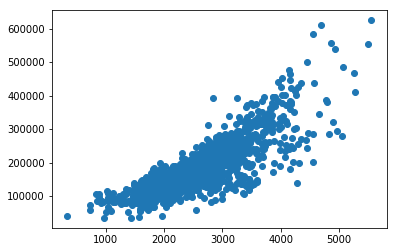

In [4]:
plt.scatter(X,y)

In [5]:
type(y)

pandas.core.series.Series

In [6]:
type(X)

pandas.core.frame.DataFrame

## Regresion lineal

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
reg.coef_

array([83.79128706])

In [15]:
reg.predict([[3500]])

array([259695.552062])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Metricas para regresiones lineales

### MAE (Mean absolute error)

In [20]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
reg.predict(X_test)


array([114528.4941373 , 145943.76160392, 143380.93715269,  45662.92098022,
       236634.67847465, 133294.98286078, 196290.861307  , 190090.47957016,
       149333.30362005, 335344.75572502, 146026.43336041, 138916.66230218,
       116595.28804958, 268711.3199932 , 207203.53316382,  38635.82167848,
       180417.88406071, 370562.92399023, 233327.80821501, 211171.77747539,
       211585.13625785, 222249.7928452 , 151813.45631479, 273506.28186968,
       205384.75452102, 167025.05950915, 137097.88365937, 111634.98266011,
       213569.25841363, 160493.99074635, 113949.79184186, 300953.30502472,
       217041.47218626, 126185.21180255, 171820.02138563, 156608.41819127,
       219604.29663748, 215718.7240824 , 240602.92278622,  41694.67666865,
       103698.49403697, 221588.41879327, 242587.04494201, 104194.52457592,
       132137.57826991, 194968.11320314, 106343.99024468, 126681.24234149,
       177937.73136597, 149333.30362005, 122878.3415429 , 117587.34912747,
       188023.68565789, 1

In [26]:
pred = reg.predict(X_test)

* Implementacion de MAE por nosotros mismos

In [29]:
np.mean(np.abs(y_test-pred))

33687.64542462718

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mean_absolute_error(y_test, pred)

33687.645424627175

### MAPE

In [30]:
np.mean(np.abs(y_test-pred)/y_test)

0.1987348040558154

(array([ 1.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  3.,  2.,  3.,  2.,  1.,
         5.,  2.,  5., 10., 13.,  9., 15.,  9., 12.,  6.,  9.,  1.,  9.,
         4.,  4.,  2.,  2.,  1.,  4.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-124605.51839602, -118177.11079339, -111748.70319076,
        -105320.29558813,  -98891.8879855 ,  -92463.48038287,
         -86035.07278024,  -79606.66517761,  -73178.25757498,
         -66749.84997235,  -60321.44236972,  -53893.03476709,
         -47464.62716446,  -41036.21956183,  -34607.8119592 ,
         -28179.40435657,  -21750.99675394,  -15322.58915131,
          -8894.18154868,   -2465.77394605,    3962.63365658,
          10391.04125921,   16819.44886184,   23247.85646447,
          29676.2640671 ,   36104.67166973,   42533.07927236,
          48961.48687499,   55389.89447762,   61818.30208025,
          68246.70968288,   74675.11728551,   81103.52488814,
          87531.93249077,   93960.

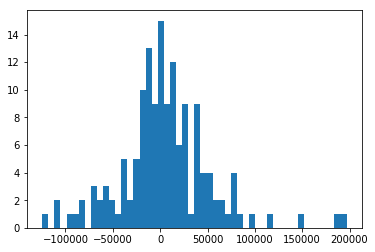

In [31]:
plt.hist(y_test-pred, bins=50)

## K Nearest Neightbouds

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
regk = KNeighborsRegressor(n_neighbors=40)

In [49]:
regk.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=40, p=2,
          weights='uniform')

In [50]:
mean_absolute_error(y_test, regk.predict(X_test))

32874.48150684931

In [53]:
maes = []
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train, y_train)
    maes.append(mean_absolute_error(y_test, regk.predict(X_test)))
    

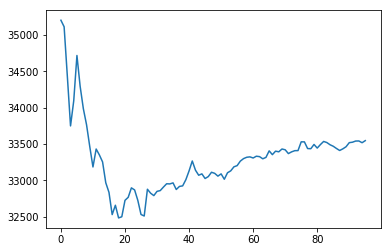

In [54]:
plt.plot(maes)

### RMSE

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
np.sqrt(mean_squared_error(y_test, regk.predict(X_test)))

51580.17455057197

### Validacion cruzada

In [60]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error")
scores

array([-30567.35842966, -29914.55399354, -31033.73334722, -27985.24232011,
       -32283.80034017])

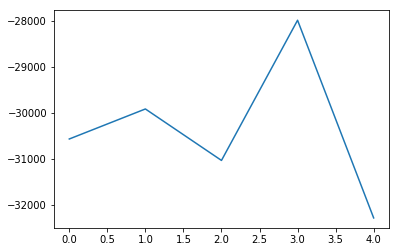

In [69]:
plt.plot(scores)

In [70]:
scores.mean()

-30356.937686139747

### Tesitng parameters

In [71]:
from sklearn.model_selection import GridSearchCV

In [77]:
reg = GridSearchCV(KNeighborsRegressor(), param_grid={"n_neighbors":range(4,100)}, cv=5, scoring="neg_mean_absolute_error")

In [78]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(4, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [79]:
reg.best_params_

{'n_neighbors': 82}

In [80]:
reg.best_score_

-30197.346752158242

In [81]:
reg.best_index_

78

In [82]:
reg.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=82, p=2,
          weights='uniform')

## Decision tree

* Busca zonas homogeneas

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
regd = DecisionTreeRegressor(max_depth=5)

In [88]:
reg = cross_val_score(regd, X, y, cv=5, scoring="neg_mean_absolute_error")

In [90]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"max_depth":range(4,100)}, cv=5, scoring="neg_mean_absolute_error")

In [92]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(4, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [93]:
reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [94]:
reg.best_params_

{'max_depth': 4}

## Uso de tus propias metricas

In [95]:
def corr_test(y_test, pred):
    return np.corrcoef(y_test, pred)[0][1]

In [96]:
from sklearn.metrics import make_scorer
cross_val_score(regd, X, y, cv=5, scoring=make_scorer(corr_test)).mean()

0.8021220619879849

In [100]:
reg = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid={"max_depth":range(4,100),
                              "min_samples_leaf":[10,30,50,100]}, cv=5, scoring=make_scorer(corr_test))

In [101]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(4, 100), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(corr_test), verbose=0)

In [102]:
reg.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [115]:
from IPython.display import Image
from sklearn.tree import export_graphviz

import pydotplus

import io

dot_data = io.StringIO()
export_graphviz(reg.best_estimator_, out_file=dot_data, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [117]:
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Classification

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clft = DecisionTreeClassifier(max_depth=3)

In [121]:
clft.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
draw(clft, X, y, 0.01)

TypeError: draw() takes 0 positional arguments but 4 were given